In [10]:
# Import required modules
import datetime
from datetime import timedelta
import geopandas as gpd
import logging
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pprint import pprint
from shapely.geometry import Point
import sys
import warnings
import xarray as xr

# Add that all figures should be inlined
%matplotlib inline

## Read data

In [8]:
# Read SWE station observations NetCDF
SWE_stations_ds = xr.open_dataset(settings['SWE_obs_path'])
SWE_stations_ds = SWE_stations_ds.assign_coords({'lon':SWE_stations_ds.lon, 'lat':SWE_stations_ds.lat, 'station_name':SWE_stations_ds.station_name}).snw
SWE_stations_ds = SWE_stations_ds.to_dataset()

display(SWE_stations_ds)

<xarray.Dataset>
Dimensions:       (station_id: 2921, time: 34911)
Coordinates:
    lat           (station_id) float32 ...
    lon           (station_id) float32 ...
    station_name  (station_id) object ...
  * station_id    (station_id) object 'ALE-05AA805' 'ALE-05AA806' ... 'RTA-CQCS'
  * time          (time) datetime64[ns] 1928-01-01 1928-01-02 ... 2023-07-31
Data variables:
    snw           (station_id, time) float32 ...

In [29]:
# Convert SWE stations DataArray to GeoDataFrame for further analysis
data = {'station_id': SWE_stations_ds.station_id.data, 
        'lon': SWE_stations_ds.lon.data, 
        'lat': SWE_stations_ds.lat.data} 
df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = "EPSG:4326"
SWE_stations_gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Read basin shapefile
settings['basins_path'] = '/Users/dcasson/Data/summa_snakemake/bow_above_banff/watershed_tools/final/bow_above_banff_elev_band.gpkg'

basins_gdf = gpd.read_file(settings['basins_path'])
basins_gdf = basins_gdf.to_crs("EPSG:4326")
buffer_km_default =0
basin_id = 'bow_above_banff'


def extract_stations_in_basin(SWE_stations_gdf, basins_gdf):
        # Perform spatial join to find stations within the basin boundary
        stations_in_basin = gpd.sjoin(SWE_stations_gdf, basins_gdf, op='within')
        
        return stations_in_basin

stations_in_basin = extract_stations_in_basin(SWE_stations_gdf, basins_gdf)
print(stations_in_basin)

        station_id         lon        lat                     geometry  \
14     ALE-05BA811 -116.466667  51.700001  POINT (-116.46667 51.70000)   
569      SCD-AL003 -115.566666  51.183334  POINT (-115.56667 51.18333)   
591      SCD-AL055 -115.599998  51.200001  POINT (-115.60000 51.20000)   
601      SCD-AL091 -116.233330  51.416668  POINT (-116.23333 51.41667)   
626      SCD-AL142 -115.916664  51.266666  POINT (-115.91666 51.26667)   
628      SCD-AL148 -116.183334  51.433334  POINT (-116.18333 51.43333)   
1744   ALE-05BA801 -116.183334  51.416668  POINT (-116.18333 51.41667)   
1745   ALE-05BA802 -116.166664  51.433334  POINT (-116.16666 51.43333)   
1746   ALE-05BA806 -116.233330  51.416668  POINT (-116.23333 51.41667)   
1747   ALE-05BA808 -116.216667  51.416668  POINT (-116.21667 51.41667)   
1748   ALE-05BA810 -116.099998  51.466667  POINT (-116.10000 51.46667)   
1749   ALE-05BA812 -116.216667  51.316666  POINT (-116.21667 51.31667)   
1750   ALE-05BA813 -116.478752  51.709

/Users/dcasson/.pyenv/versions/3.10.0/envs/gpep_snakemake/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


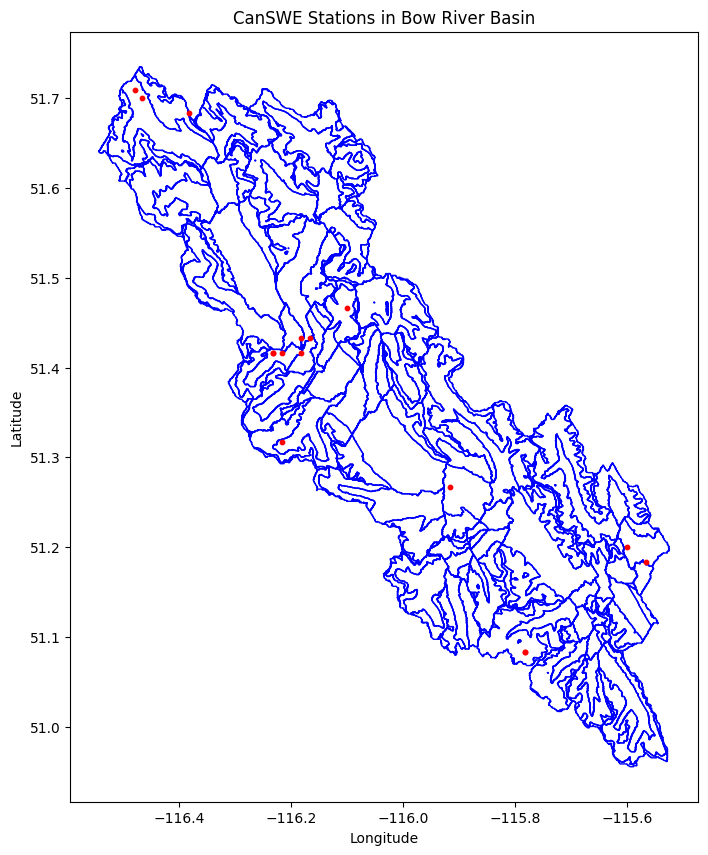

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile
basins_gdf.plot(ax=ax, facecolor='none', edgecolor='blue')

# Plot the stations
stations_in_basin.plot(ax=ax, color='red', markersize=10)

# Set the title and axis labels
ax.set_title('CanSWE Stations in Bow River Basin')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

<xarray.DataArray 'snw' (station_id: 2921, time: 2192)>
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,  99.5 , 100.75, 102.5 ],
       [   nan,    nan,    nan, ...,  79.25,  82.75,  87.5 ],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]], dtype=float32)
Coordinates:
    lat           (station_id) float32 49.27 49.82 49.25 ... 50.3 49.25 48.75
    lon           (station_id) float32 -114.3 -114.6 -114.1 ... 71.46 71.83
    station_name  (station_id) object ...
  * station_id    (station_id) object 'ALE-05AA805' 'ALE-05AA806' ... 'RTA-CQCS'
  * time          (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2020-12-31
Attributes:
    long_name:      Water equivalent of snow cover
    standard_name:  surface_snow_amount
    units:          kg m**-2


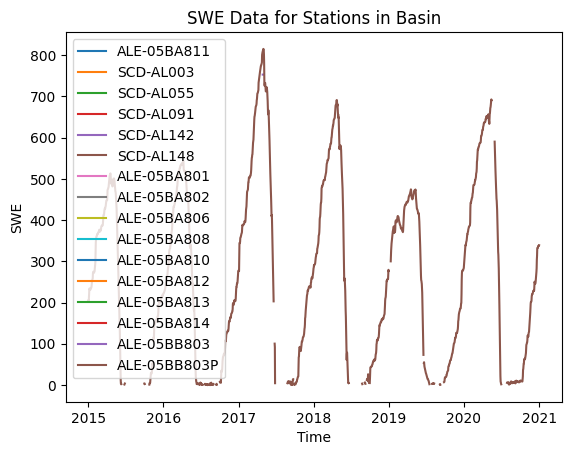

In [45]:
# Convert SWE stations DataArray to GeoDataFrame for further analysis
swe_data = {'station_id': SWE_stations_ds.station_id.data, 
        'lon': SWE_stations_ds.lon.data, 
        'lat': SWE_stations_ds.lat.data,
}
print(SWE_stations_ds.snw)

import matplotlib.pyplot as plt

# Iterate over each station in stations_in_basin
for station_id in stations_in_basin['station_id']:
        
        #Subset based on time 2020-01-01 to 2020-12-31
        SWE_stations_ds = SWE_stations_ds.sel(time=slice('2015-01-01', '2023-12-31'))
        # Get the snw data for the current station

        snw_data = SWE_stations_ds.sel(station_id=station_id)['snw']
        
        # Plot the snw data
        plt.plot(snw_data.time, snw_data, label=station_id)

# Set the plot title and labels
plt.title('SWE Data for Stations in Basin')
plt.xlabel('Time')
plt.ylabel('SWE')

# Add a legend
plt.legend()

# Show the plot
plt.show()

You can zoom into the map with the rectangle icon ("zoom to rectangle") showing below the figure. Here, you see that the sample data contains SWE station observations for an area around two river basins, one in the USA and one in Canada, for which we also have all the data needed to run this workflow (e.g., discharge observations).

We will now extract the SWE station observations in the test basin and make a few plots.

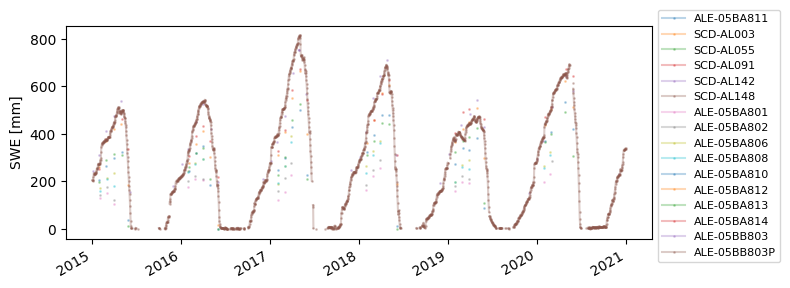

In [47]:
# Plot timeseries of SWE station observations in the test basin
fig = plt.figure(figsize=(8,3))

for s in SWE_testbasin_ds.station_id.values:
    SWE_testbasin_ds.snw.sel(station_id = s).plot(marker='o', alpha=.3, markersize=1, label=s)

plt.title('')
plt.ylabel('SWE [mm]')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1,1.1), loc='upper left', fontsize=8)
plt.tight_layout();

In [45]:
# Save the figure
fig.savefig(settings['plots_path']+"SWE_timeseries_basin"+test_basin_id+".png", dpi=300)

In [46]:
# Close the figure - please run this as it will ensure that we're not overloading the memory unnecessarily
plt.close(fig)

<IPython.core.display.Javascript object>


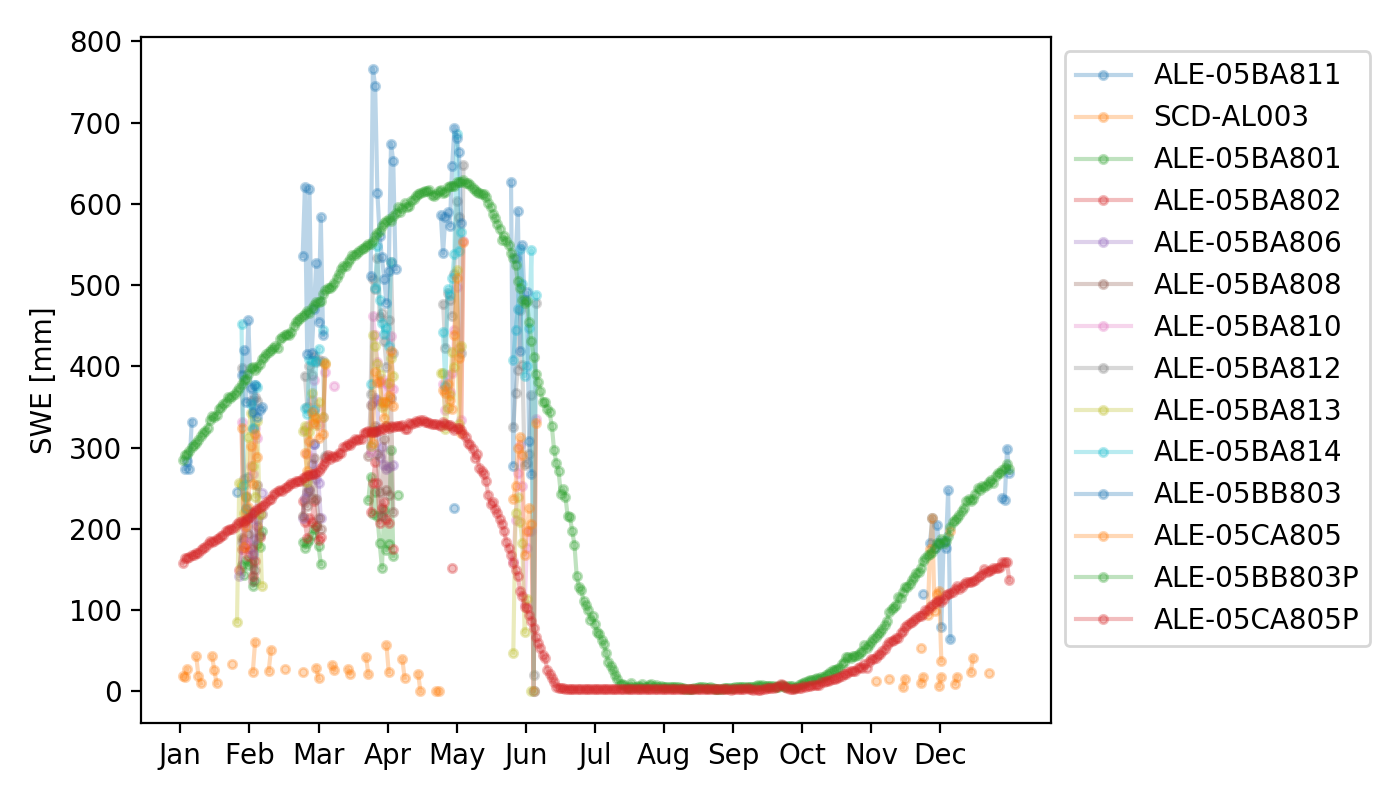

In [19]:
# Plot timeseries of test basin SWE observations climatological means
# We expect to see warnings as some days of the year only have missing values
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    
    fig = plt.figure(figsize=(7,4))

    for s in SWE_testbasin_ds.station_id.values:
        testbasin_SWE_climatology_means = SWE_testbasin_ds.snw.sel(station_id = s).groupby("time.dayofyear").mean(dim=xr.ALL_DIMS, skipna=True)
        testbasin_SWE_climatology_means.plot(marker='o', alpha=.3, markersize=3, label=s)

    plt.title('')
    plt.xticks(np.linspace(0,366,13)[:-1], ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
    plt.xlabel('')
    plt.ylabel('SWE [mm]')
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    plt.tight_layout();

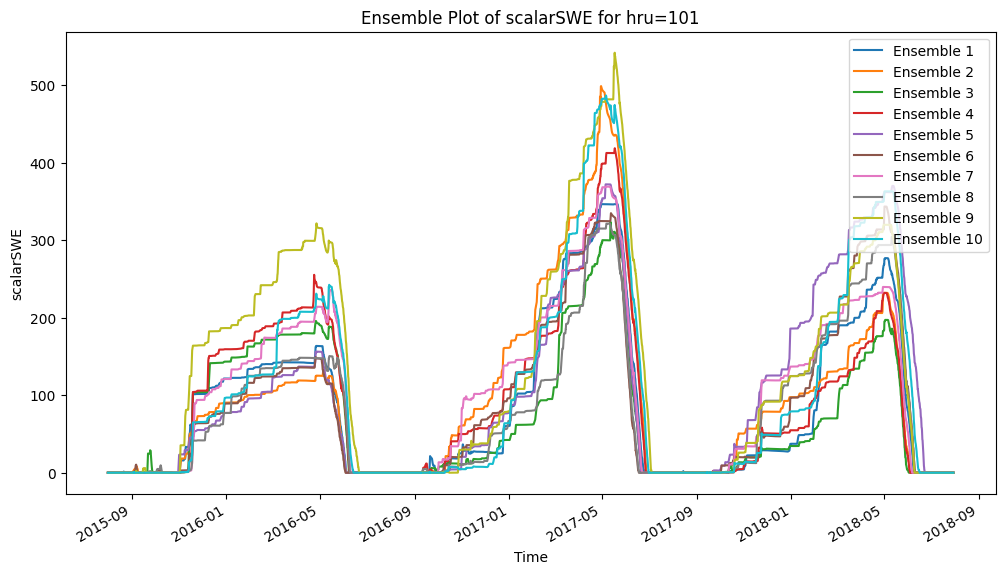

In [3]:
import os
import xarray as xr
import matplotlib.pyplot as plt

def plot_ensemble_from_directory(directory, variable_name, dimension_name, dimension_value):
    """
    Reads all NetCDF files in a directory and plots the user-defined variable
    for a specific dimension value from each file as an ensemble. The x-axis represents time.

    Parameters:
    - directory (str): Path to the directory containing NetCDF files.
    - variable_name (str): Name of the variable to plot.
    - dimension_name (str): Name of the dimension to filter.
    - dimension_value (int or str): Value of the dimension to filter.
    """
    # List to hold the datasets
    datasets = []

    # Read all NetCDF files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.nc'):
            filepath = os.path.join(directory, filename)
            ds = xr.open_dataset(filepath)
            datasets.append(ds)

    # Plot the variable for each dataset
    plt.figure(figsize=(12, 6))
    
    for ds in datasets:
        if variable_name in ds and dimension_name in ds.dims:
            ds_filtered = ds.sel({dimension_name: dimension_value})
            ds_filtered[variable_name].plot.line(x='time', add_legend=True)
    
    plt.title(f'Ensemble Plot of {variable_name} for {dimension_name}={dimension_value}')
    plt.xlabel('Time')
    plt.ylabel(variable_name)
    plt.legend([f'Ensemble {i+1}' for i in range(len(datasets))], loc='upper right')
    plt.show()

# Example usage:
# plot_ensemble_from_directory('/path/to/netcdf/files', 'prcp', 'hru', 1)

# Example usage:
path_to_results = '/Users/dcasson/Data/summa_snakemake/bow_above_banff/summa/output/'
plot_ensemble_from_directory(path_to_results, 'scalarSWE', 'hru', 101)

In [5]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import matplotlib.dates as mdates

def read_station_data(station_file, station_name):
    """
    Reads the station data from a NetCDF file for a specific station.

    Parameters:
    - station_file (str): Path to the NetCDF file containing station data.
    - station_name (str): Name of the station to read.

    Returns:
    - xarray.DataArray: DataArray for the specified station.
    """
    ds = xr.open_dataset(station_file)
    station_names = ds['station_name'].values
    if station_name in station_names:
        station_index = list(station_names).index(station_name)
        return ds.isel(station_id=station_index)['snw']
    else:
        raise ValueError(f"Station '{station_name}' not found in the file.")
    
def plot_ensemble_from_directory(directory, station_file, station_name, variable_name, dimension_name, dimension_value, output_path):
    """
    Reads all NetCDF files in a directory and plots the user-defined variable
    for a specific dimension value from each file as an ensemble. The x-axis represents time.

    Parameters:
    - directory (str): Path to the directory containing NetCDF files.
    - variable_name (str): Name of the variable to plot.
    - dimension_name (str): Name of the dimension to filter.
    - dimension_value (int or str): Value of the dimension to filter.
    - output_path (str): Path to save the output plot.
    """
    # List to hold the variable data for each ensemble member
    ensemble_data = []

    # Read the station data
    station_data = read_station_data(station_file, station_name)

    # Read all NetCDF files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.nc'):
            filepath = os.path.join(directory, filename)
            ds = xr.open_dataset(filepath)
            if variable_name in ds and dimension_name in ds.dims:
                ds_filtered = ds.sel({dimension_name: dimension_value})
                ensemble_data.append(ds_filtered[variable_name].values)

    # Convert ensemble data to a numpy array for easier manipulation
    ensemble_data = np.array(ensemble_data)
    
    # Calculate the required statistics
    max_envelope = np.max(ensemble_data, axis=0)
    min_envelope = np.min(ensemble_data, axis=0)
    p90_envelope = np.percentile(ensemble_data, 90, axis=0)
    p10_envelope = np.percentile(ensemble_data, 10, axis=0)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Add the station data to the plot
    station_data.plot.scatter(x='time', color='black', linewidth=2, label=station_name)

    # Plot the envelopes
    time = ds_filtered['time'].values
    plt.fill_between(time, min_envelope, max_envelope, color='lightblue', alpha=0.3, label='Max-Min Envelope')
    plt.fill_between(time, p10_envelope, p90_envelope, color='blue', alpha=0.3, label='90-10 Percentile Envelope')

    plt.title(f'Ensemble Plot of {variable_name} for {dimension_name}={dimension_value}')
    plt.xlabel('Time')
    plt.ylabel(variable_name)
    plt.legend(loc='upper right')

    # Set the x-axis limits to the desired range of dates
    start_date = '2015-08-01'
    end_date = '2018-12-31'
    plt.xlim(mdates.datestr2num(start_date), mdates.datestr2num(end_date))

    plt.savefig(output_path)
    plt.close()

# Read the CSV file with stations and HRU_IDs
stations_with_hru_ids_file = '/Users/dcasson/Data/summa_snakemake/bow_above_banff/stations_with_hru_ids.csv'
stations_df = pd.read_csv(stations_with_hru_ids_file)

# Directory containing NetCDF files
netcdf_directory = '/Users/dcasson/Data/summa_snakemake/bow_above_banff/summa/output/'
figure_directory = Path('/Users/dcasson/Data/summa_snakemake/bow_above_banff/swe_figures/')
station_file = '/Users/dcasson/Data/CanSWE/CanSWE-CanEEN_1928-2023_v6.nc'
figure_directory.mkdir(exist_ok=True)

# Iterate through each row in the CSV and create a plot for each HRU_ID and station pair
for index, row in stations_df.iterrows():
    station_name = row['station_name']
    hru_id = int(row['HRU_ID'])

    # Define the output path for the plot
    output_plot_path = f'{figure_directory}/ensemble_plot_{station_name}_HRU_{hru_id}.png'
    
    # Create the plot
    plot_ensemble_from_directory(netcdf_directory, station_file, station_name, 'scalarSWE', 'hru', hru_id, output_plot_path)

In [12]:
import xarray as xr

def clip_netcdf_by_bounding_box(netcdf_file, output_file, lon_min, lat_min, lon_max, lat_max):
    """
    Clips the NetCDF file by the specified bounding box and maintains the station ID.

    Parameters:
    - netcdf_file (str): Path to the input NetCDF file.
    - output_file (str): Path to save the clipped NetCDF file.
    - lon_min (float): Minimum longitude for the bounding box.
    - lat_min (float): Minimum latitude for the bounding box.
    - lon_max (float): Maximum longitude for the bounding box.
    - lat_max (float): Maximum latitude for the bounding box.
    """
    # Load the NetCDF file
    ds = xr.open_dataset(netcdf_file)
    
    # Clip the dataset by the bounding box
    clipped_ds = ds.where(
        (ds['lon'] >= lon_min) & (ds['lon'] <= lon_max) &
        (ds['lat'] >= lat_min) & (ds['lat'] <= lat_max),
        drop=True
    )
    
    # Save the clipped dataset to a new NetCDF file
    clipped_ds.to_netcdf(output_file)
# Define the bounding box
lon_min = -117.5
lat_min = 50.25
lon_max = -114.5
lat_max = 52.25
netcdf_file = '/Users/dcasson/Data/gpep/from_hpc/all_station_data.nc'
output_file = '/Users/dcasson/Data/gpep/from_hpc/evaluation_stations_new.nc'
#clip_netcdf_by_bounding_box(netcdf_file, output_file, lon_min, lat_min, lon_max, lat_max)

eval_ds = xr.open_dataset(output_file)
print(eval_ds)

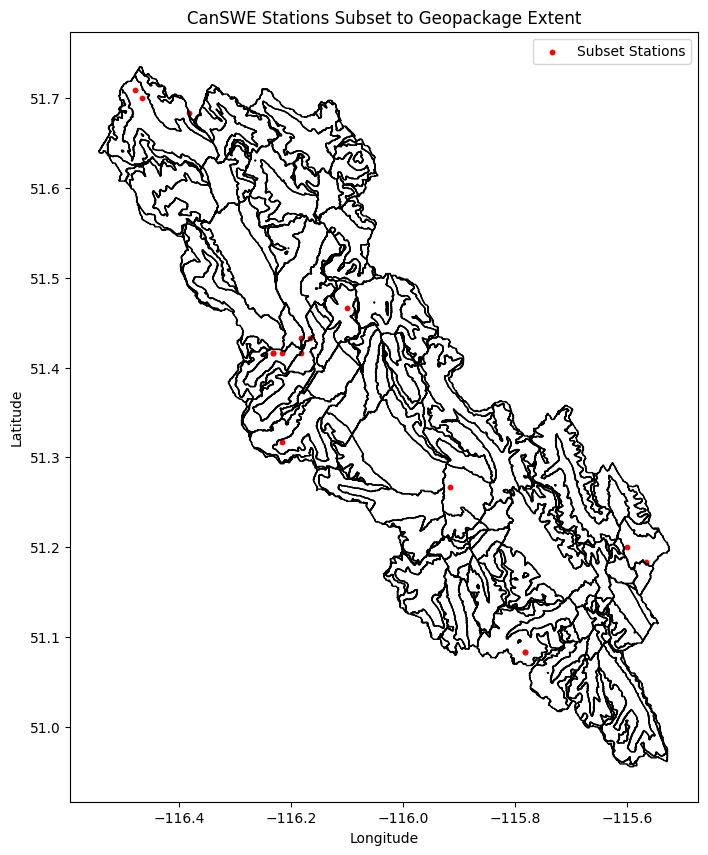

In [6]:
import xarray as xr
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, MultiPolygon
import matplotlib.pyplot as plt

# Load the CanSWE NetCDF dataset
canswe_dataset = xr.open_dataset('/Users/dcasson/Data/CanSWE/CanSWE-CanEEN_1928-2023_v6.nc')
extent_gdf = gpd.read_file('/Users/dcasson/Data/summa_snakemake/bow_above_banff/watershed_tools/final/bow_above_banff_elev_band.gpkg')

# Extract lat, lon, and station_id variables
lats = canswe_dataset['lat'].values
lons = canswe_dataset['lon'].values
station_ids = canswe_dataset['station_id'].values  # Assuming station_id is a variable

# Convert CanSWE stations to a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(lons, lats)]
canswe_gdf = gpd.GeoDataFrame({'station_id': station_ids}, geometry=geometry, crs='EPSG:4326')

# Explode multi-part geometries to single-part geometries if necessary
if isinstance(extent_gdf.geometry.iloc[0], MultiPolygon):
    extent_gdf = extent_gdf.explode(index_parts=True)

# Initialize an empty GeoDataFrame for the subset
subset_gdf = gpd.GeoDataFrame(columns=canswe_gdf.columns, crs=canswe_gdf.crs)

# Perform the spatial join for each single-part geometry
for part in extent_gdf.geometry:
    temp_gdf = gpd.GeoDataFrame(geometry=[part], crs=extent_gdf.crs)
    temp_subset = gpd.sjoin(canswe_gdf, temp_gdf, how='inner', predicate='within')
    subset_gdf = pd.concat([subset_gdf, temp_subset], ignore_index=True)


# Plotting the result
fig, ax = plt.subplots(figsize=(10, 10))
extent_gdf.boundary.plot(ax=ax, color='black', linewidth=1)
subset_gdf.plot(ax=ax, color='red', markersize=10, label='Subset Stations')

plt.legend()
plt.title('CanSWE Stations Subset to Geopackage Extent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
import geopandas as gpd
import xarray as xr
from shapely.geometry import Point

def read_and_convert_shapefile(shp_file):
    # Load the shapefile
    gdf = gpd.read_file(shp_file)
    
    # Ensure geometries are valid
    gdf['geometry'] = gdf['geometry'].apply(lambda geom: geom.buffer(0) if not geom.is_valid else geom)
    
    # Explode multi-part geometries into single-part geometries
    gdf = gdf.explode(index_parts=False)
    
    return gdf

def get_hru_ids(shp_file, nc_file):
    gdf = read_and_convert_shapefile(shp_file)
    
    ds = xr.open_dataset(nc_file)
    
    lats = ds['lat'].values
    lons = ds['lon'].values
    
    stations = gpd.GeoDataFrame({'latitude': lats, 'longitude': lons})
    stations['geometry'] = stations.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
    stations.set_crs(epsg=4326, inplace=True)
    
    joined = gpd.sjoin(stations, gdf, how='left', op='within')
    
    hru_ids = joined['HRU_ID']

    
    #drop nan values
    hru_ids = hru_ids.dropna()
    # Add lat lon and station_name to the hru_ids
    hru_ids = hru_ids.to_frame()
    hru_ids['lat'] = lats[hru_ids.index]
    hru_ids['lon'] = lons[hru_ids.index]
    hru_ids['station_name'] = ds['station_name'].values[hru_ids.index]
    hru_ids['station_id'] = ds['station_id'].values[hru_ids.index]
    return hru_ids

canswe_dataset = '/Users/dcasson/Data/CanSWE/CanSWE-CanEEN_1928-2023_v6.nc'
extent_gdf = '/Users/dcasson/Data/summa_snakemake/bow_above_banff/watershed_tools/final/bow_above_banff_elev_band.gpkg'


hru_ids = get_hru_ids(extent_gdf,canswe_dataset)
# Export to csv
hru_ids.to_csv('/Users/dcasson/Data/summa_snakemake/bow_above_banff/stations_with_hru_ids.csv')

/var/folders/w4/qfhdls_x5jj48jhgnhtfv1lm0000gn/T/ipykernel_6922/1702922871.py:26: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  stations['geometry'] = stations.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
/Users/dcasson/.pyenv/versions/3.10.0/envs/gpep_snakemake/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


/var/folders/w4/qfhdls_x5jj48jhgnhtfv1lm0000gn/T/ipykernel_7930/1743181417.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swe_hru[aso_var] = df_swe_hru[aso_var]*1000
/var/folders/w4/qfhdls_x5jj48jhgnhtfv1lm0000gn/T/ipykernel_7930/1743181417.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swe_hru['time'] = pd.to_datetime(df_swe_hru['time'])


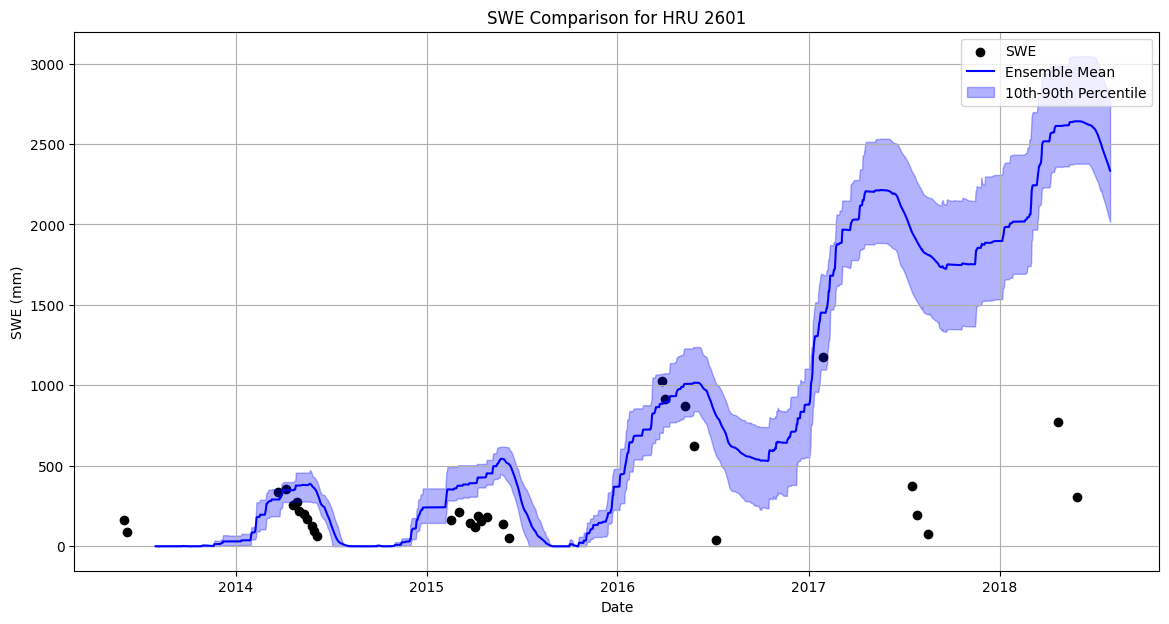

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np

def plot_swe_comparison(hru_id, start_date, end_date, swe_file, ensemble_files, aso_var = 'swe', summa_var='scalarSWE'):
    # Load the Tuolumne SWE data
    ds_swe = xr.open_dataset(swe_file)
    
    # Extract SWE data for the specified HRU and time period
    df_swe = ds_swe.sel(time=slice(start_date, end_date)).to_dataframe().reset_index()
    df_swe_hru = df_swe[df_swe['HRU_ID'] == hru_id]
    # Multiple swe variable by 1000
    if aso_var == 'swe':
        df_swe_hru[aso_var] = df_swe_hru[aso_var]*1000
    elif aso_var == 'snow_depth':
        df_swe_hru[aso_var] = df_swe_hru[aso_var]*1#0

    # Initialize a DataFrame to hold ensemble data
    df_ensemble = pd.DataFrame()

    # Load and process each ensemble file
    for idx, file in enumerate(ensemble_files):
        ds_ensemble_temp = xr.open_dataset(file)
        ds_swe_ensemble = ds_ensemble_temp[summa_var]
        df_ensemble_file = ds_swe_ensemble.sel(time=slice(start_date, end_date)).to_dataframe().reset_index()
        df_ensemble_file_hru = df_ensemble_file[df_ensemble_file['hru'] == hru_id]
        
        if df_ensemble.empty:
            df_ensemble = df_ensemble_file_hru[['time', summa_var]].rename(columns={summa_var: f'{summa_var}_{idx}'})
        else:
            df_ensemble = df_ensemble.merge(df_ensemble_file_hru[['time', summa_var]].rename(columns={summa_var: f'{summa_var}_{idx}'}), on='time', how='outer')

    
    # Convert ensemble data to numeric and handle NaN values
    df_ensemble.set_index('time', inplace=True)
    df_ensemble = df_ensemble.apply(pd.to_numeric, errors='coerce')
    ensemble_mean = df_ensemble.mean(axis=1).dropna()
    ensemble_max = df_ensemble.max(axis=1).dropna()
    ensemble_10th = df_ensemble.apply(lambda x: np.percentile(x.dropna(), 10), axis=1)
    ensemble_90th = df_ensemble.apply(lambda x: np.percentile(x.dropna(), 90), axis=1)

    # Ensure all indices are datetime
    ensemble_mean.index = pd.to_datetime(ensemble_mean.index)
    ensemble_max.index = pd.to_datetime(ensemble_max.index)
    ensemble_10th.index = pd.to_datetime(ensemble_10th.index)
    ensemble_90th.index = pd.to_datetime(ensemble_90th.index)
    df_swe_hru['time'] = pd.to_datetime(df_swe_hru['time'])

    # Plot the SWE data
    plt.figure(figsize=(14, 7))
    plt.scatter(pd.to_datetime(df_swe_hru['time']), pd.to_numeric(df_swe_hru[aso_var], errors='coerce'), label='SWE', color='black')
    
    # Plot the ensemble statistics
    plt.plot(ensemble_mean.index, ensemble_mean, label='Ensemble Mean', color='blue')
    plt.fill_between(ensemble_mean.index, ensemble_10th, ensemble_90th, color='blue', alpha=0.3, label='10th-90th Percentile')

    # Formatting the plot
    plt.xlabel('Date')
    plt.ylabel('SWE (mm)')
    plt.title(f'SWE Comparison for HRU {hru_id}')
    plt.legend()
    plt.grid(True)
    plt.show()


# File paths
swe_file = '/Users/dcasson/Data/snow_data/tuolumne_lidar/tuolumne_swe_data.nc'
ensemble_files = Path('/Users/dcasson/Data/summa_snakemake/hydrofabric_tuolumne/summa/output/').glob('*.nc')

# Example usage
plot_swe_comparison(hru_id=2601, start_date='2013-06-01', end_date='2018-12-31', swe_file=swe_file, ensemble_files=ensemble_files, aso_var = 'swe', summa_var='scalarSWE')